In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats

sns.set_theme()

print("Seaborn: {}".format(sns.__version__))
print("NumPy: {}".format(np.__version__))

Seaborn: 0.11.0
NumPy: 1.17.4


In [3]:
# Usable list

info = ["SEX","EDUCATION","MARRIAGE","AGE"]
delay_n = ["PAY_APR", "PAY_MAY", "PAY_JUN", "PAY_JUL", "PAY_AUG", "PAY_SEP"]
bill_n = ["BILL_AMT_APR", "BILL_AMT_MAY", "BILL_AMT_JUN", "BILL_AMT_JUL", "BILL_AMT_AUG", "BILL_AMT_SEP"]
pay_n = ["PAY_AMT_APR", "PAY_AMT_MAY", "PAY_AMT_JUN", "PAY_AMT_JUL", "PAY_AMT_AUG", "PAY_AMT_SEP"]

In [4]:
train = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-train-0.0-0.0 (1).csv")
test = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-test-0.0-0.0 (1).csv")

length = len(train)

rename_dict =  {"default payment next month":"default", 
                                "PAY_6" : "PAY_APR", 
                                "PAY_5" : "PAY_MAY", 
                                "PAY_4" : "PAY_JUN",  
                                "PAY_3" : "PAY_JUL",
                                "PAY_2": "PAY_AUG", 
                                "PAY_0": "PAY_SEP", 
                                "PAY_AMT6": "PAY_AMT_APR", 
                                "PAY_AMT5": "PAY_AMT_MAY", 
                                "PAY_AMT4": "PAY_AMT_JUN",
                                "PAY_AMT3": "PAY_AMT_JUL", 
                                "PAY_AMT2": "PAY_AMT_AUG", 
                                "PAY_AMT1": "PAY_AMT_SEP", 
                                "BILL_AMT6": "BILL_AMT_APR", 
                                "BILL_AMT5": "BILL_AMT_MAY", 
                                "BILL_AMT4": "BILL_AMT_JUN", 
                                "BILL_AMT3": "BILL_AMT_JUL", 
                                "BILL_AMT2": "BILL_AMT_AUG",
                                "BILL_AMT1": "BILL_AMT_SEP"}

#Change the column name "default payment next month" -> "default"
train = train.rename(columns = rename_dict)
test = test.rename(columns = rename_dict)

train = train.drop(["ID","sep_idx"], axis = 1)
train_drop_info = train.drop(info, axis = 1)

test = test.drop(["ID","sep_idx"], axis = 1)

# Change Type

train["SEX"] = train["SEX"].astype(np.int)
train["EDUCATION"] = train["EDUCATION"].astype(np.int)
train["MARRIAGE"] = train["MARRIAGE"].astype(np.int)
train["AGE"] = train["AGE"].astype(np.int)
train["default"] = train["default"].astype(np.int)
train[delay_n] = train[delay_n].astype(np.int)

test["SEX"] = test["SEX"].astype(np.int)
test["EDUCATION"] = test["EDUCATION"].astype(np.int)
test["MARRIAGE"] = test["MARRIAGE"].astype(np.int)
test["AGE"] = test["AGE"].astype(np.int)
test["default"] = test["default"].astype(np.int)
test[delay_n] = test[delay_n].astype(np.int)

In [5]:
X_train = train.drop("default", axis = 1)
y_train = train["default"]

In [6]:
for i in range(train.shape[0]):
    age = train.loc[i, "AGE"]
    if age >= 20 and age < 30:
        train.loc[i, "BINS_1"] = 0   ##[20,30)
    elif age < 40:
        train.loc[i, "BINS_1"] = 1    ##[30, 40)
    elif age < 50: 
        train.loc[i, "BINS_1"] = 2   ##[40, 50)
    elif age <60 :
        train.loc[i, "BINS_1"] = 3   ##[50, 60)
    elif age< 70:
        train.loc[i, "BINS_1"] = 4   ##[60, 70)
    else:
        train.loc[i, "BINS_1"] = 5   ##[70, 80)

for i in range(train.shape[0]):
    lb = train.loc[i, "LIMIT_BAL"]
    if lb >= 10000 and lb < 109000:
        train.loc[i, "BINS_2"] = 0   ##[10000,109000)
    elif lb < 208000:
        train.loc[i, "BINS_2"] = 1    ##[109000, 208000)
    elif lb < 307000: 
        train.loc[i, "BINS_2"] = 2   ##[208000, 307000)
    elif lb <406000 :
        train.loc[i, "BINS_2"] = 3   ##[307000, 406000)
    elif lb< 505000:
        train.loc[i, "BINS_2"] = 4   ##[406000, 505000)
    elif lb <604000:
        train.loc[i, "BINS_2"] = 5   ##[505000, 604000)
    elif lb <703000:
        train.loc[i, "BINS_2"] = 6   ##[604000, 703000)
    elif lb <802000:
        train.loc[i, "BINS_2"] = 7   ##[703000, 802000)
    elif lb < 901000:
        train.loc[i, "BINS_2"] = 8   ##[802000, 901000)
    else:
        train.loc[i, "BINS_2"] = 9  ##[901000, 1000000)

- Limit Bal의 bin별로 BILL_AMT_SEP과 PAY_AMT_SEP을 확인

In [16]:
train.groupby(["BINS_2","default"]).agg({"BILL_AMT_SEP": "mean", "PAY_AMT_SEP":"mean"})

BILL_AMT_SEP   PAY_AMT_SEP
BINS_2 default                             
0.0    0         31007.672351   3019.814684
       1         28957.150457   2117.852931
1.0    0         54719.788560   6019.859369
       1         59122.245543   4096.415721
2.0    0         62855.582554   7563.357682
       1         72222.283804   4524.023774
3.0    0         68792.354417  11686.283325
       1         84144.500000   5532.701258
4.0    0         91189.572727  13926.295455
       1        107043.842767   8429.264151
5.0    0        134679.395604  16748.802198
       1        371858.066667  12064.133333
6.0    0        177913.650000  18490.075000
       1        232527.333333   5289.333333
7.0    0        157481.750000  34469.687500
       1        104811.333333   5576.333333
9.0    0        964511.000000  50784.000000

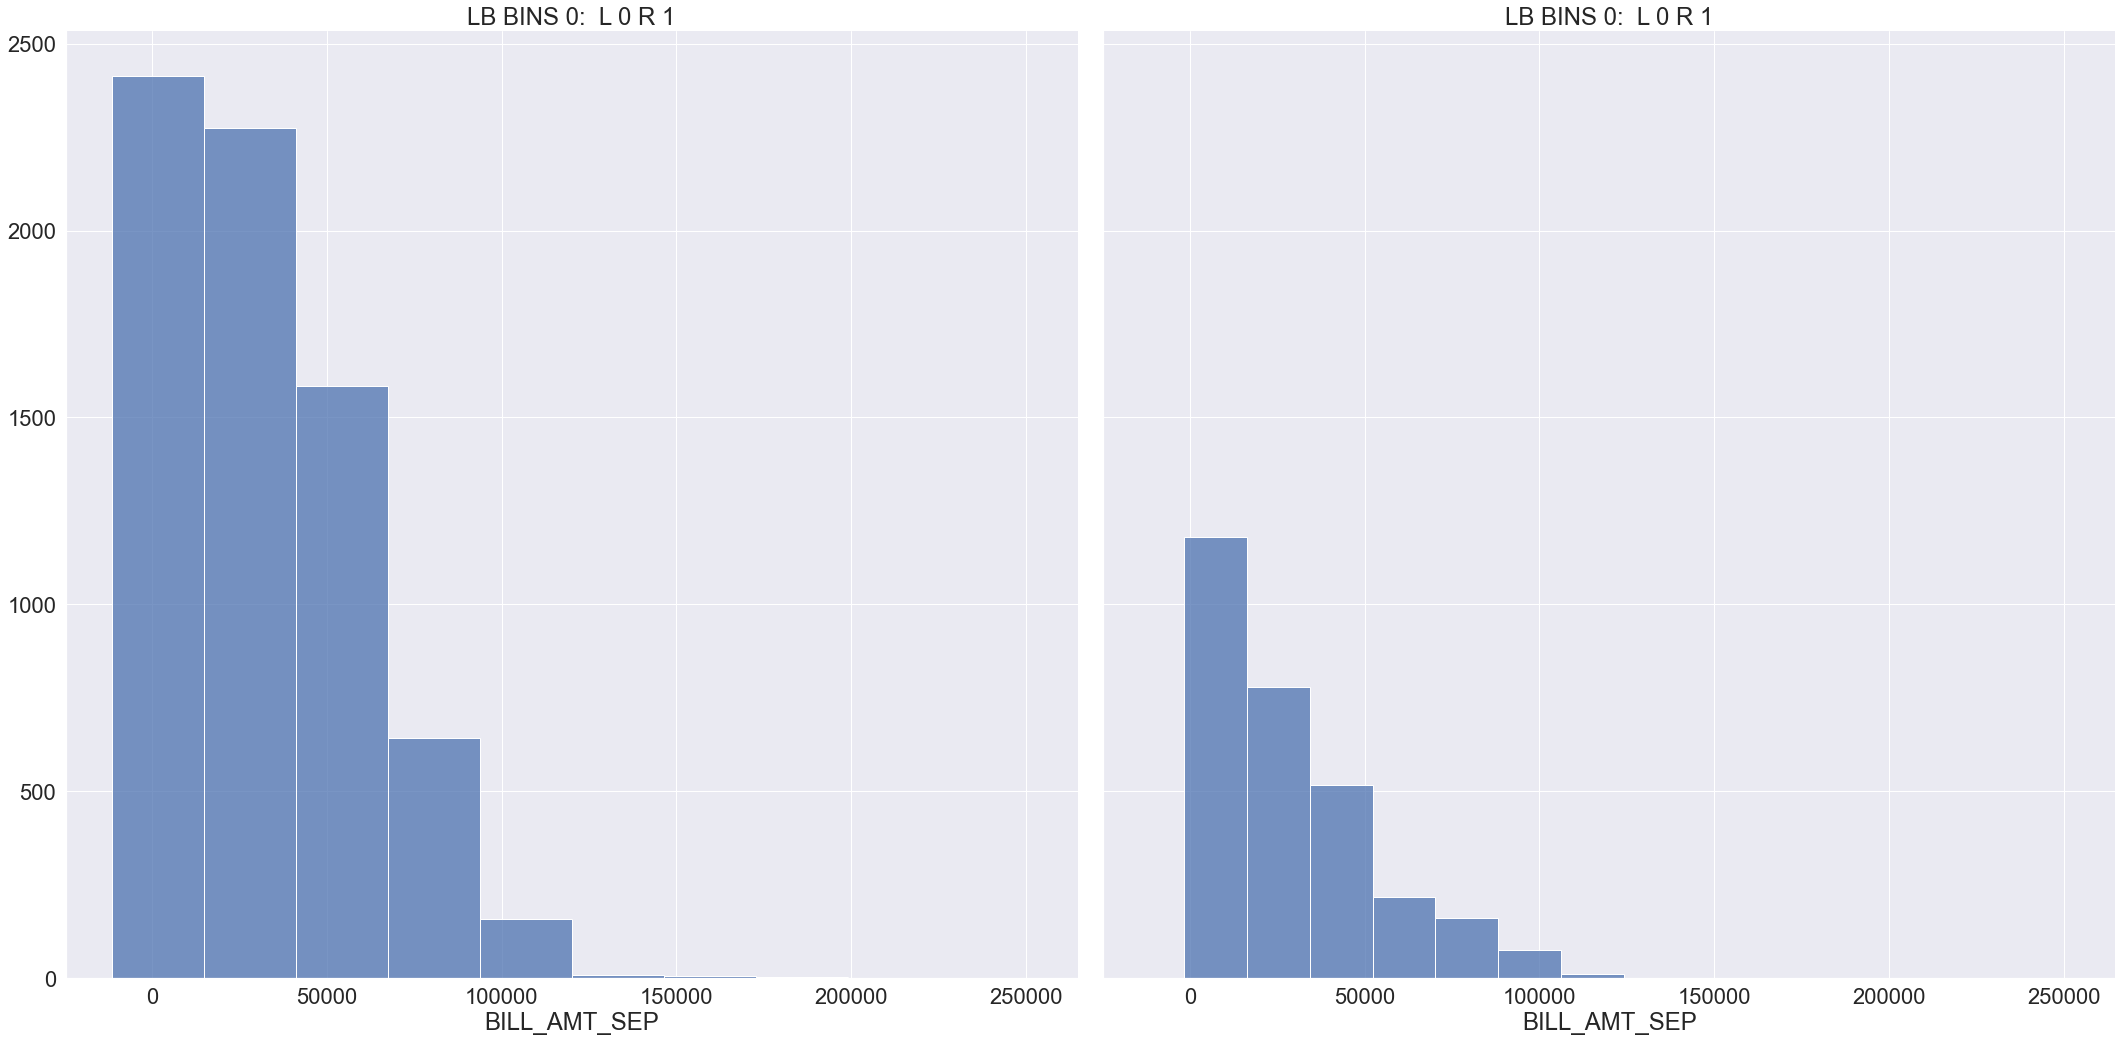

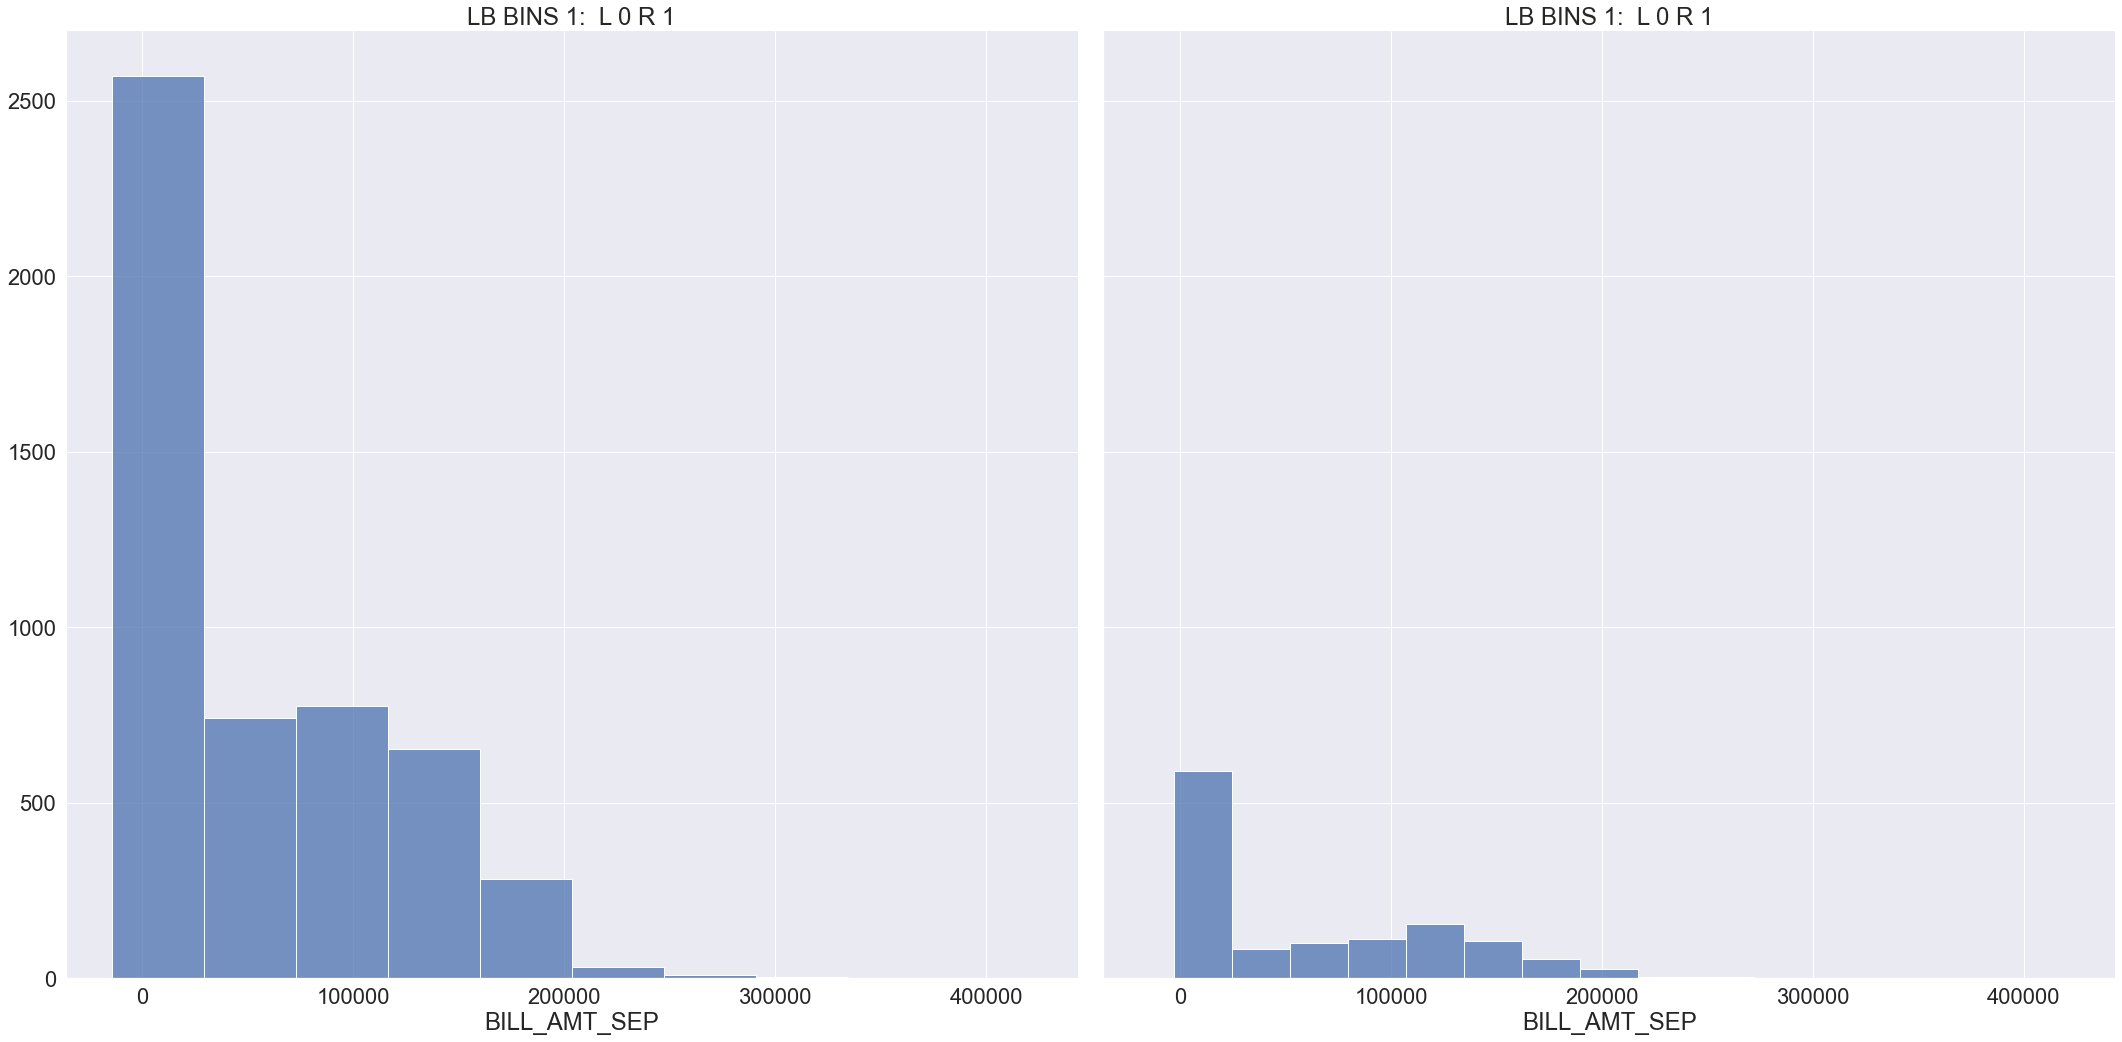

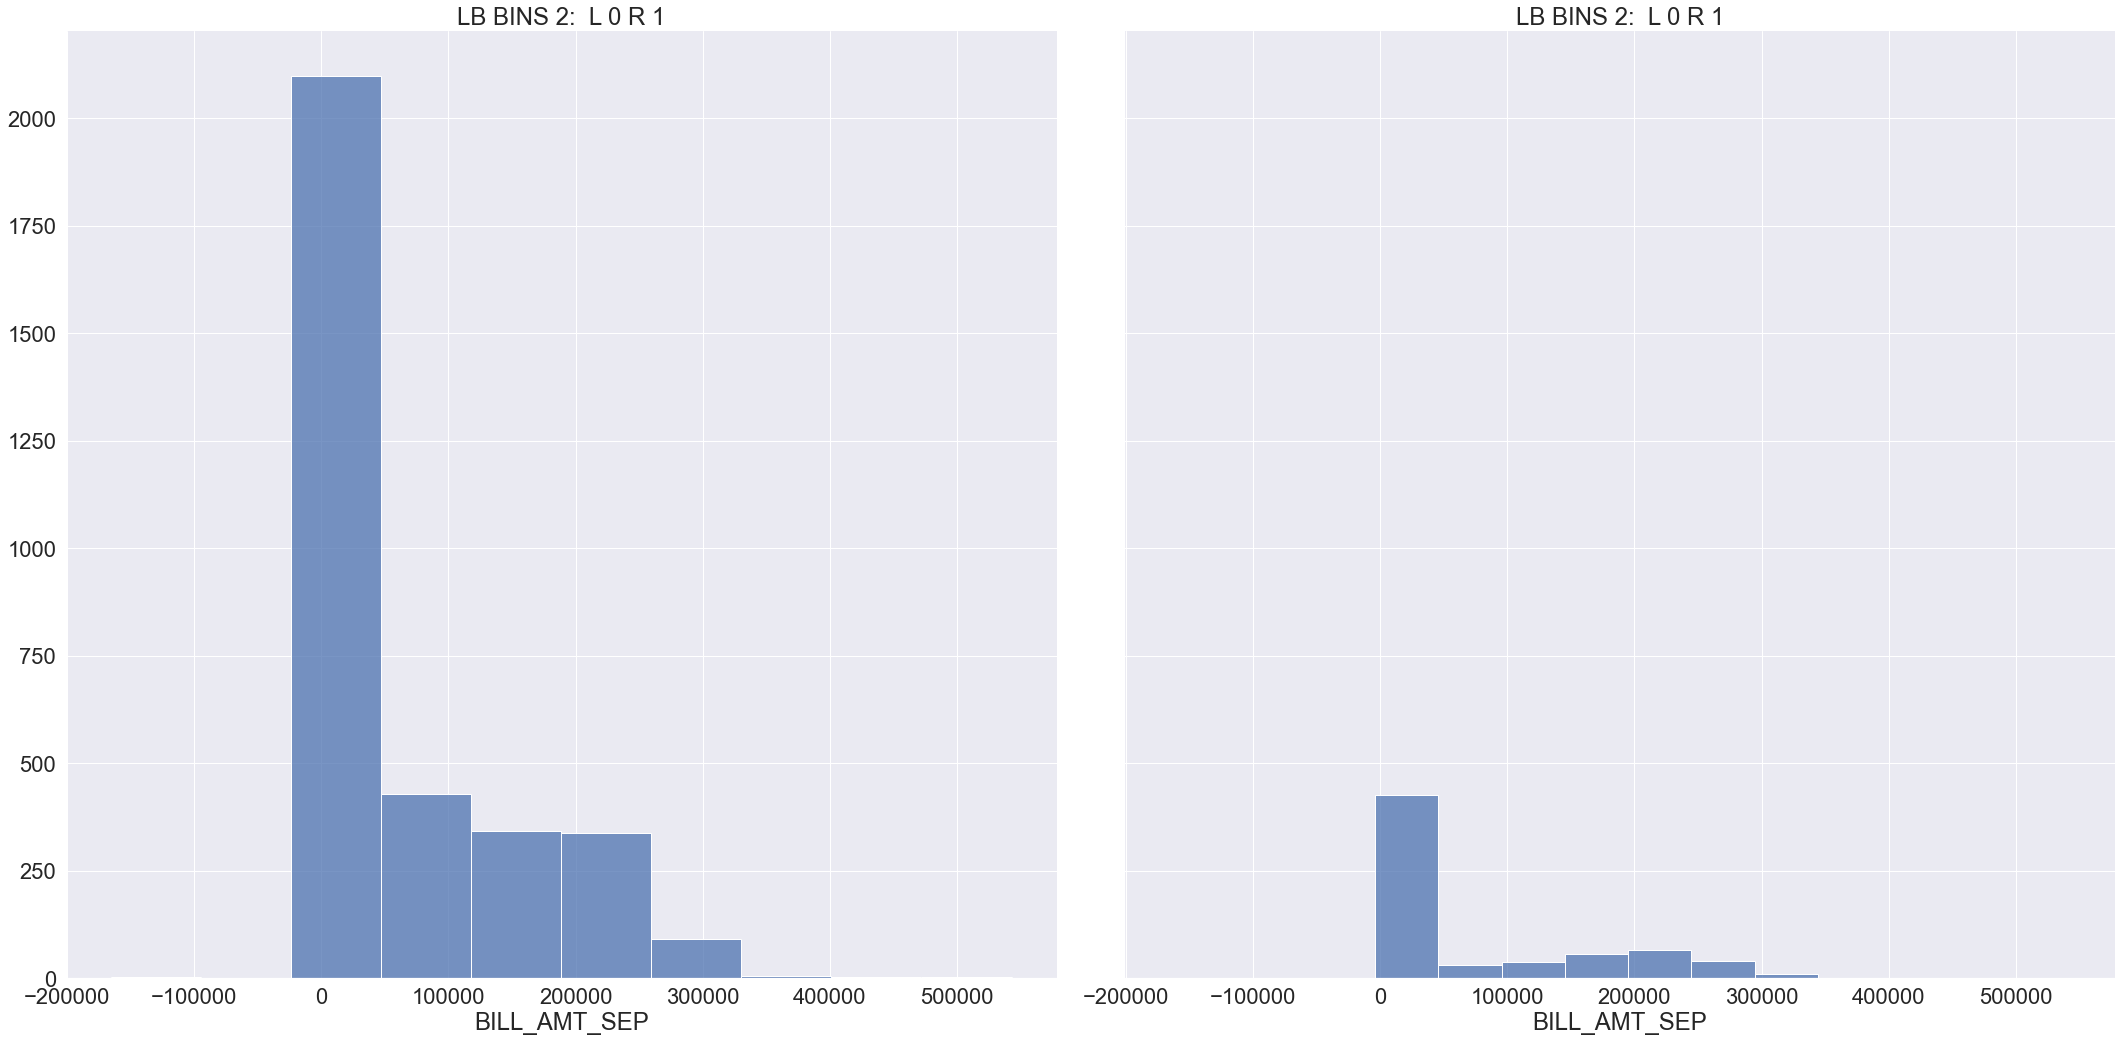

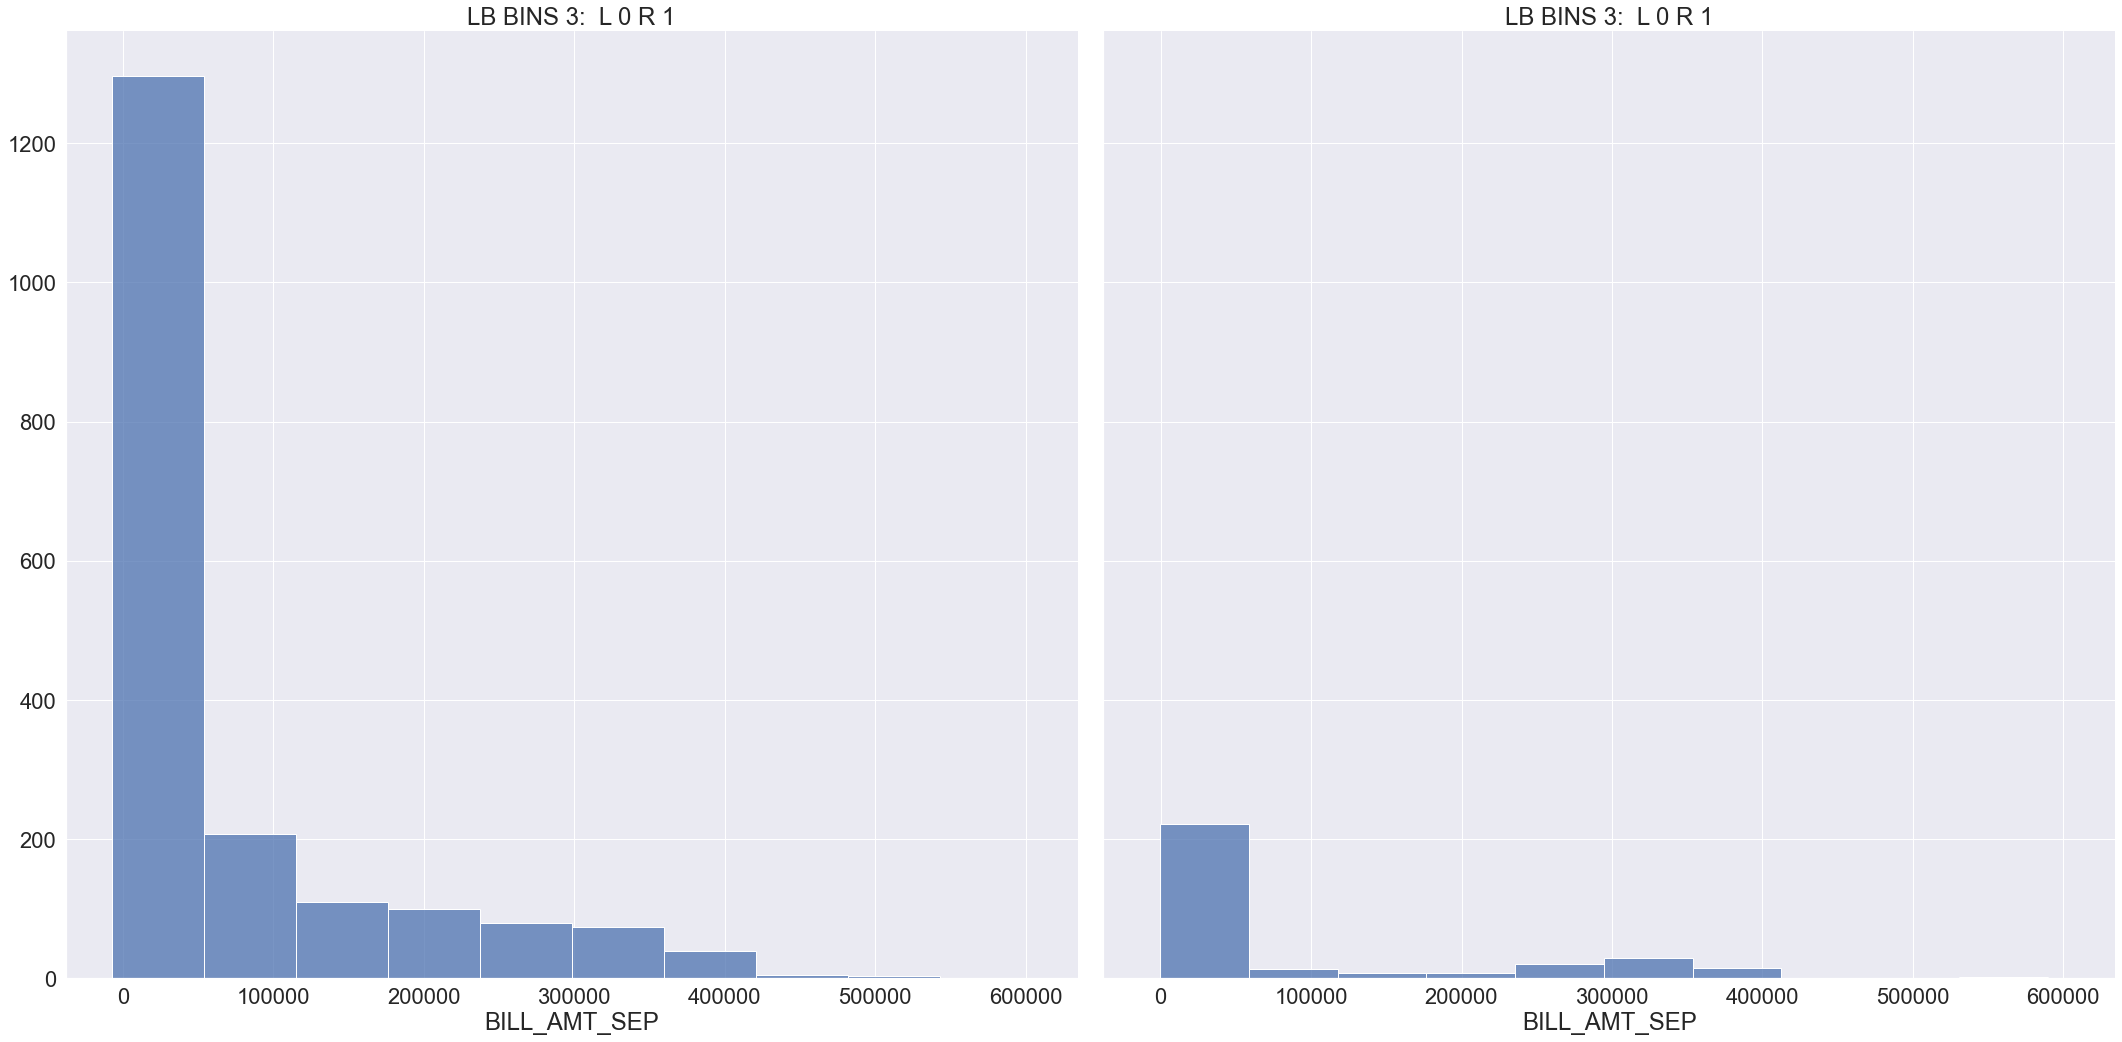

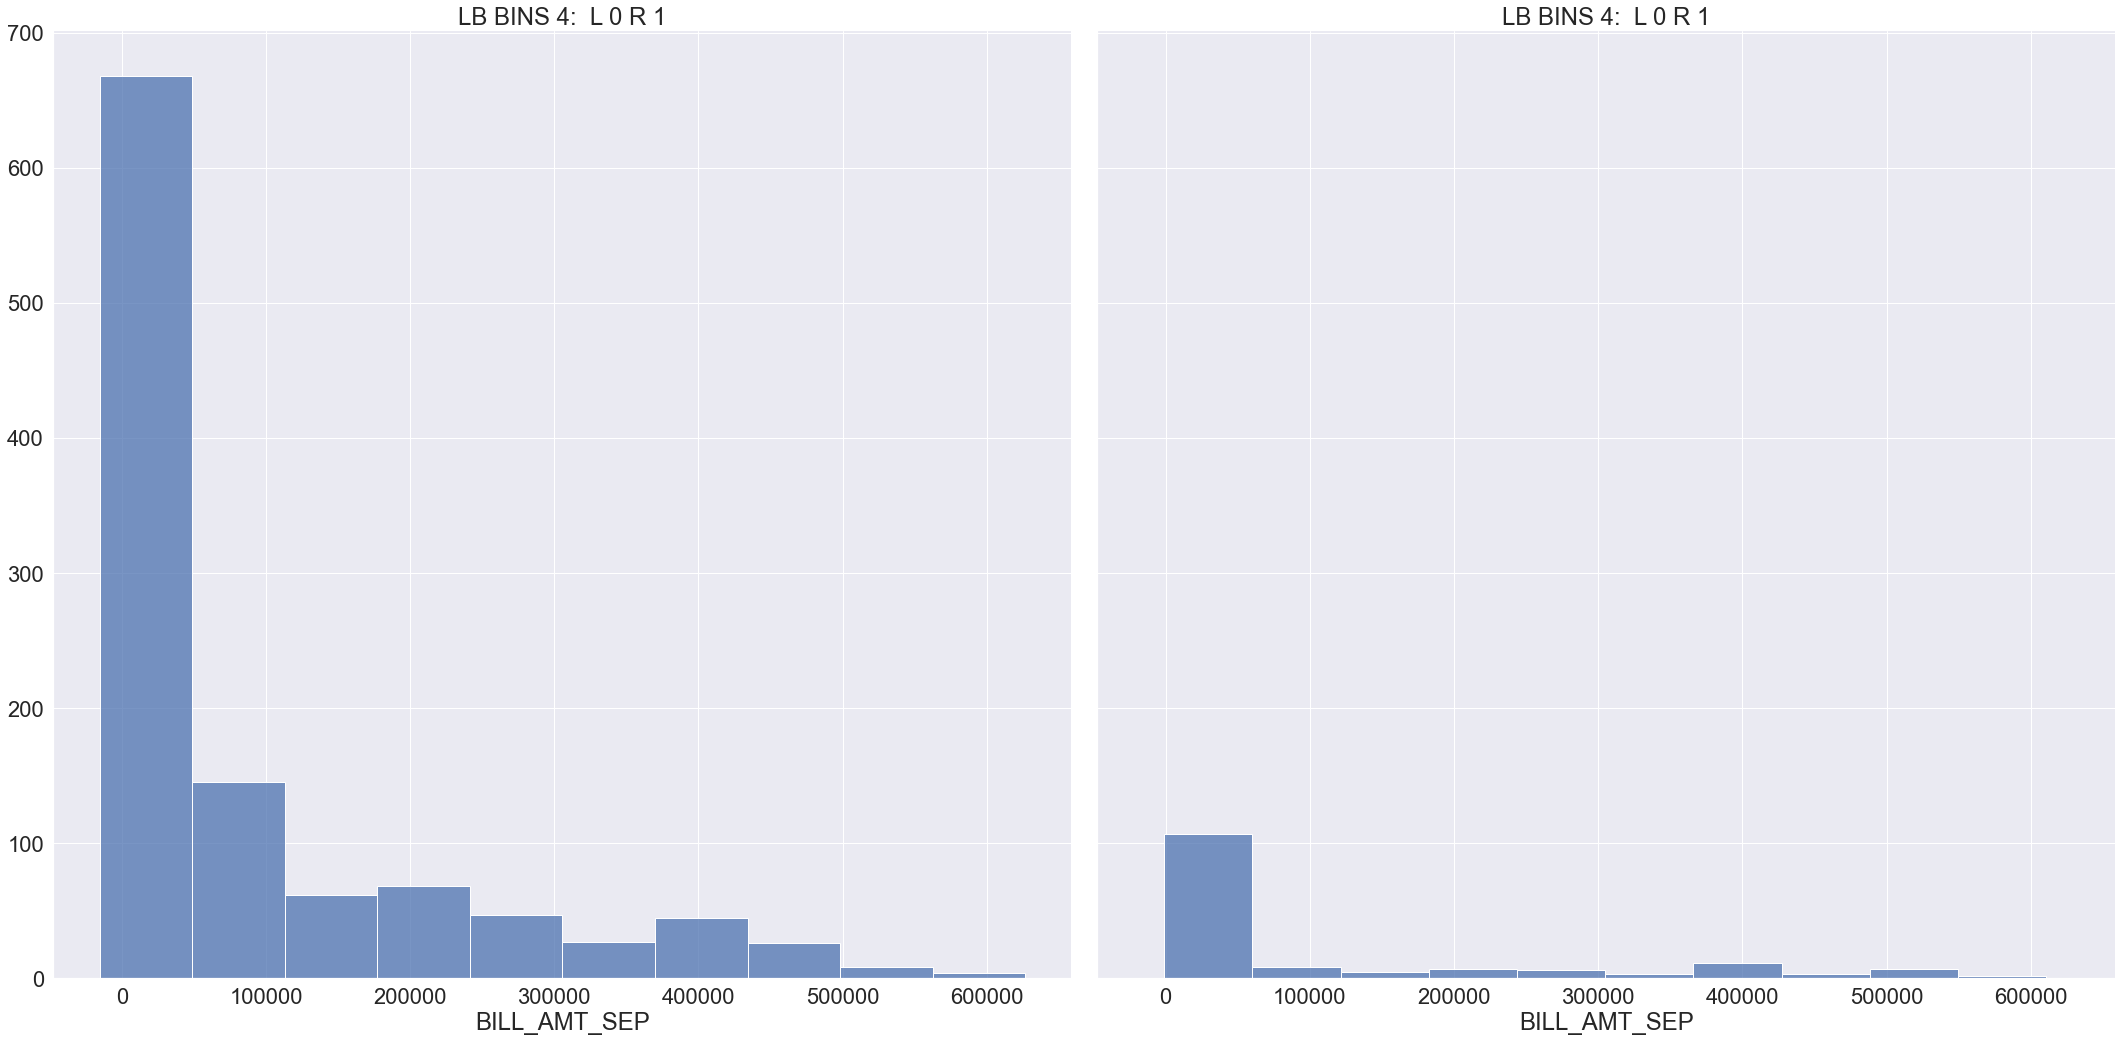

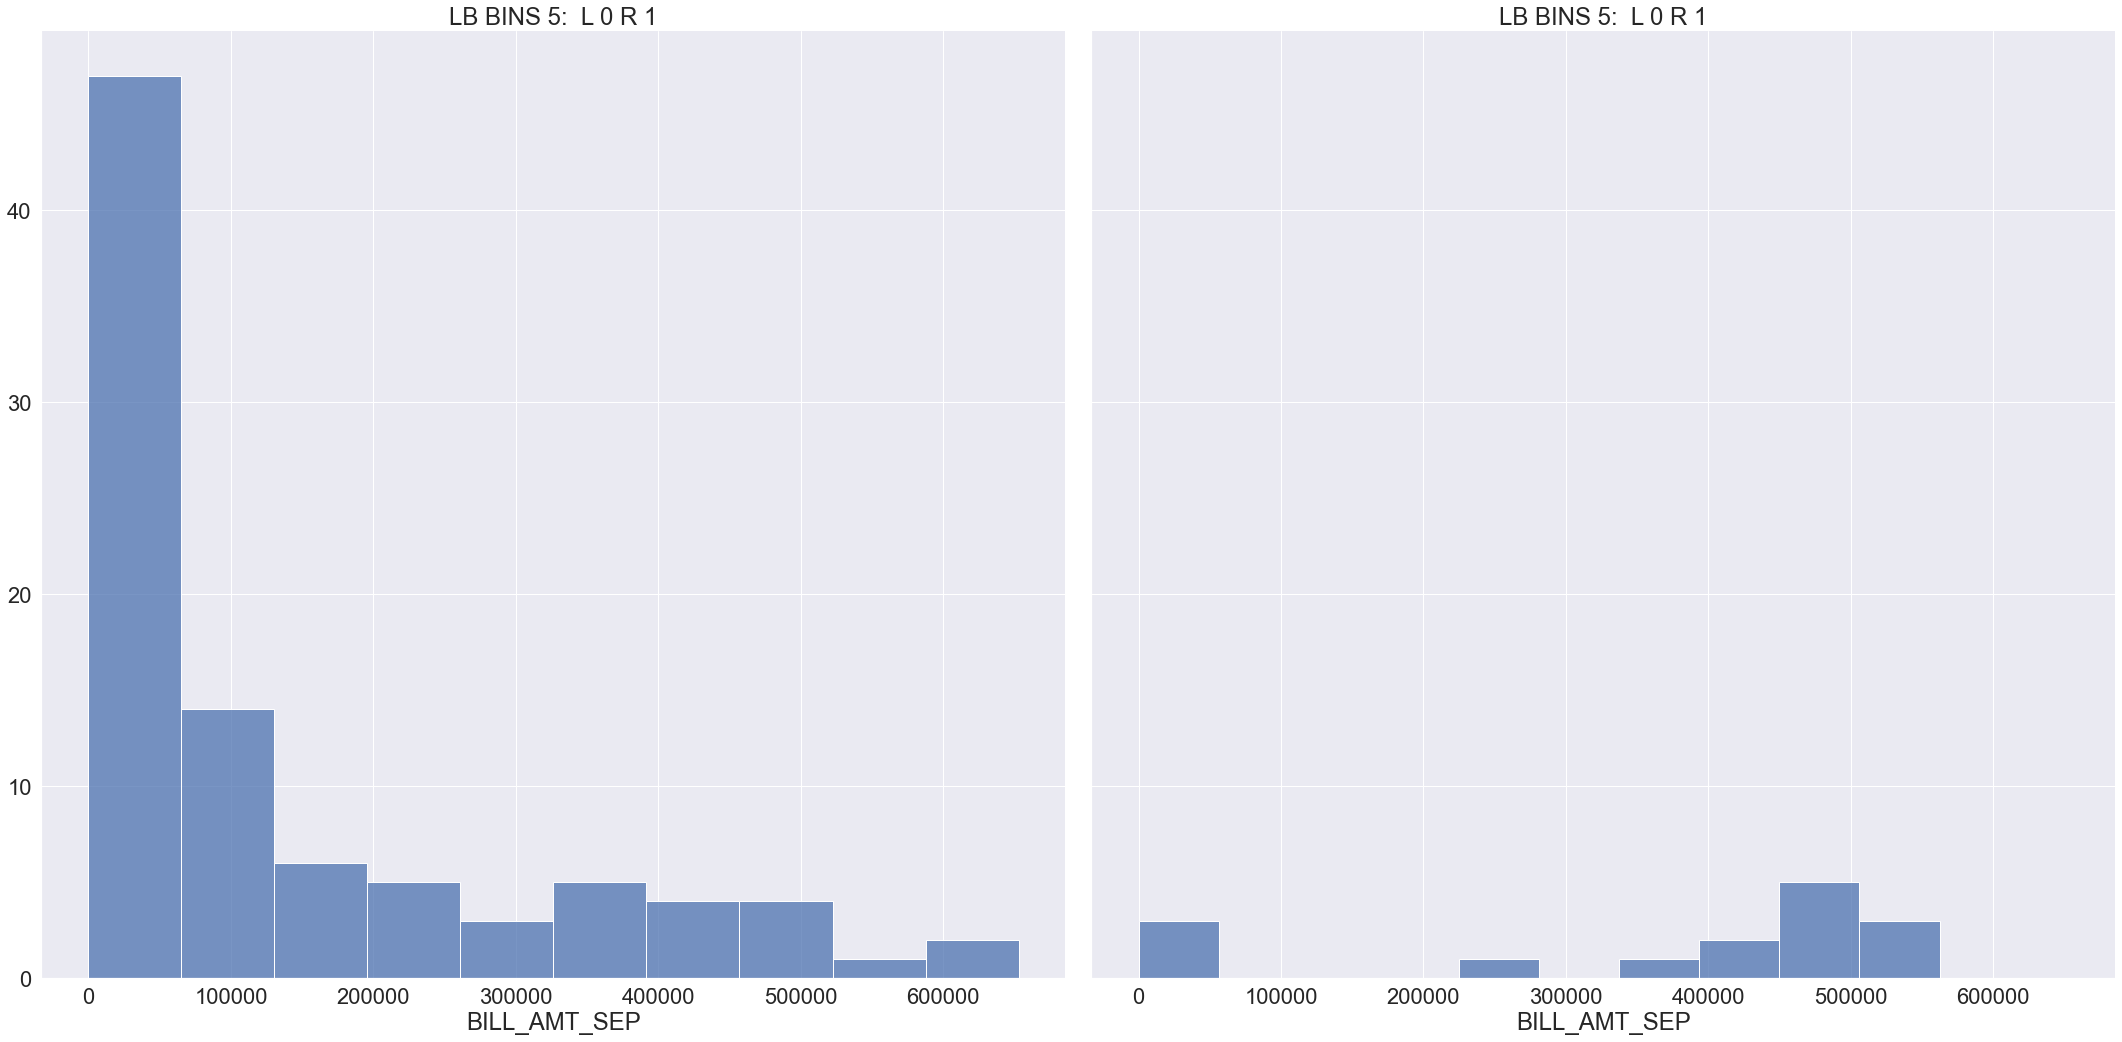

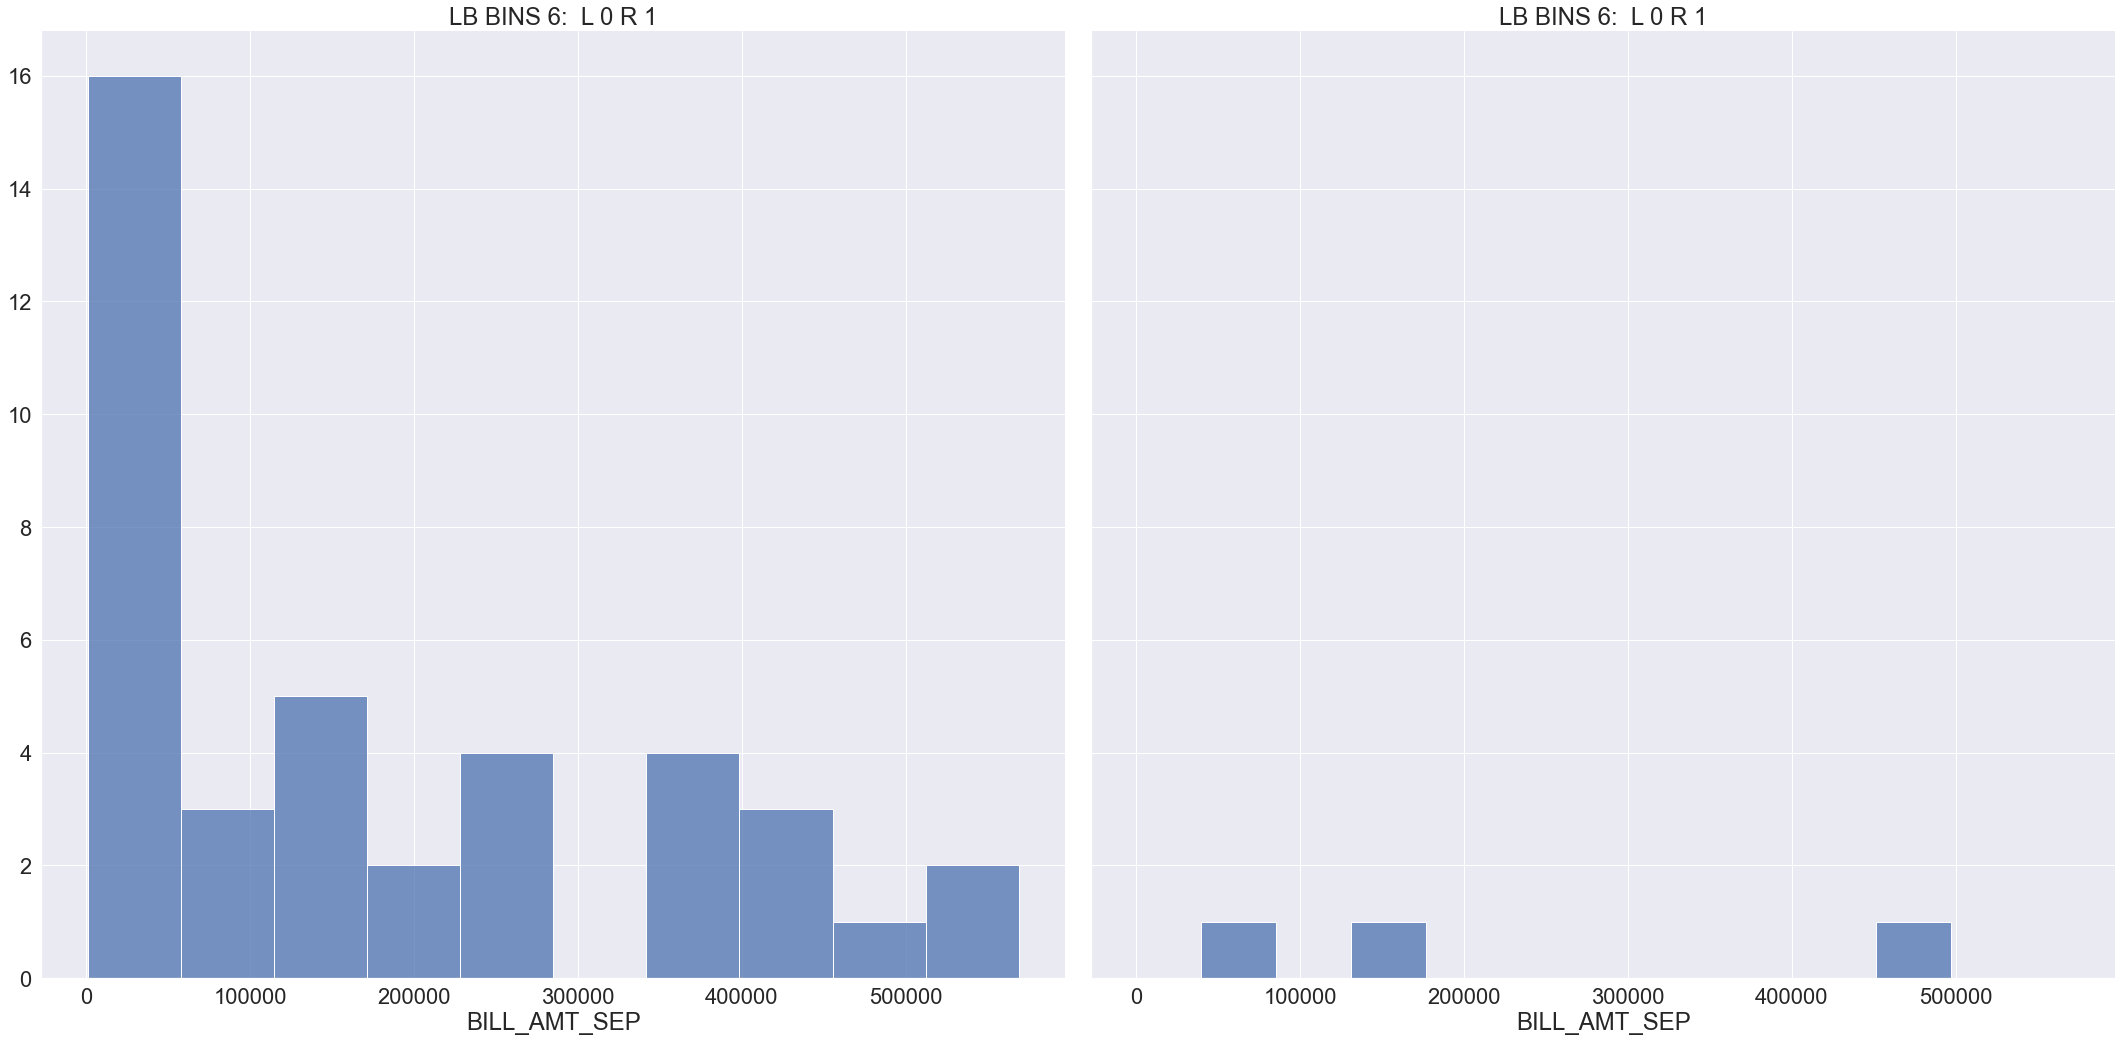

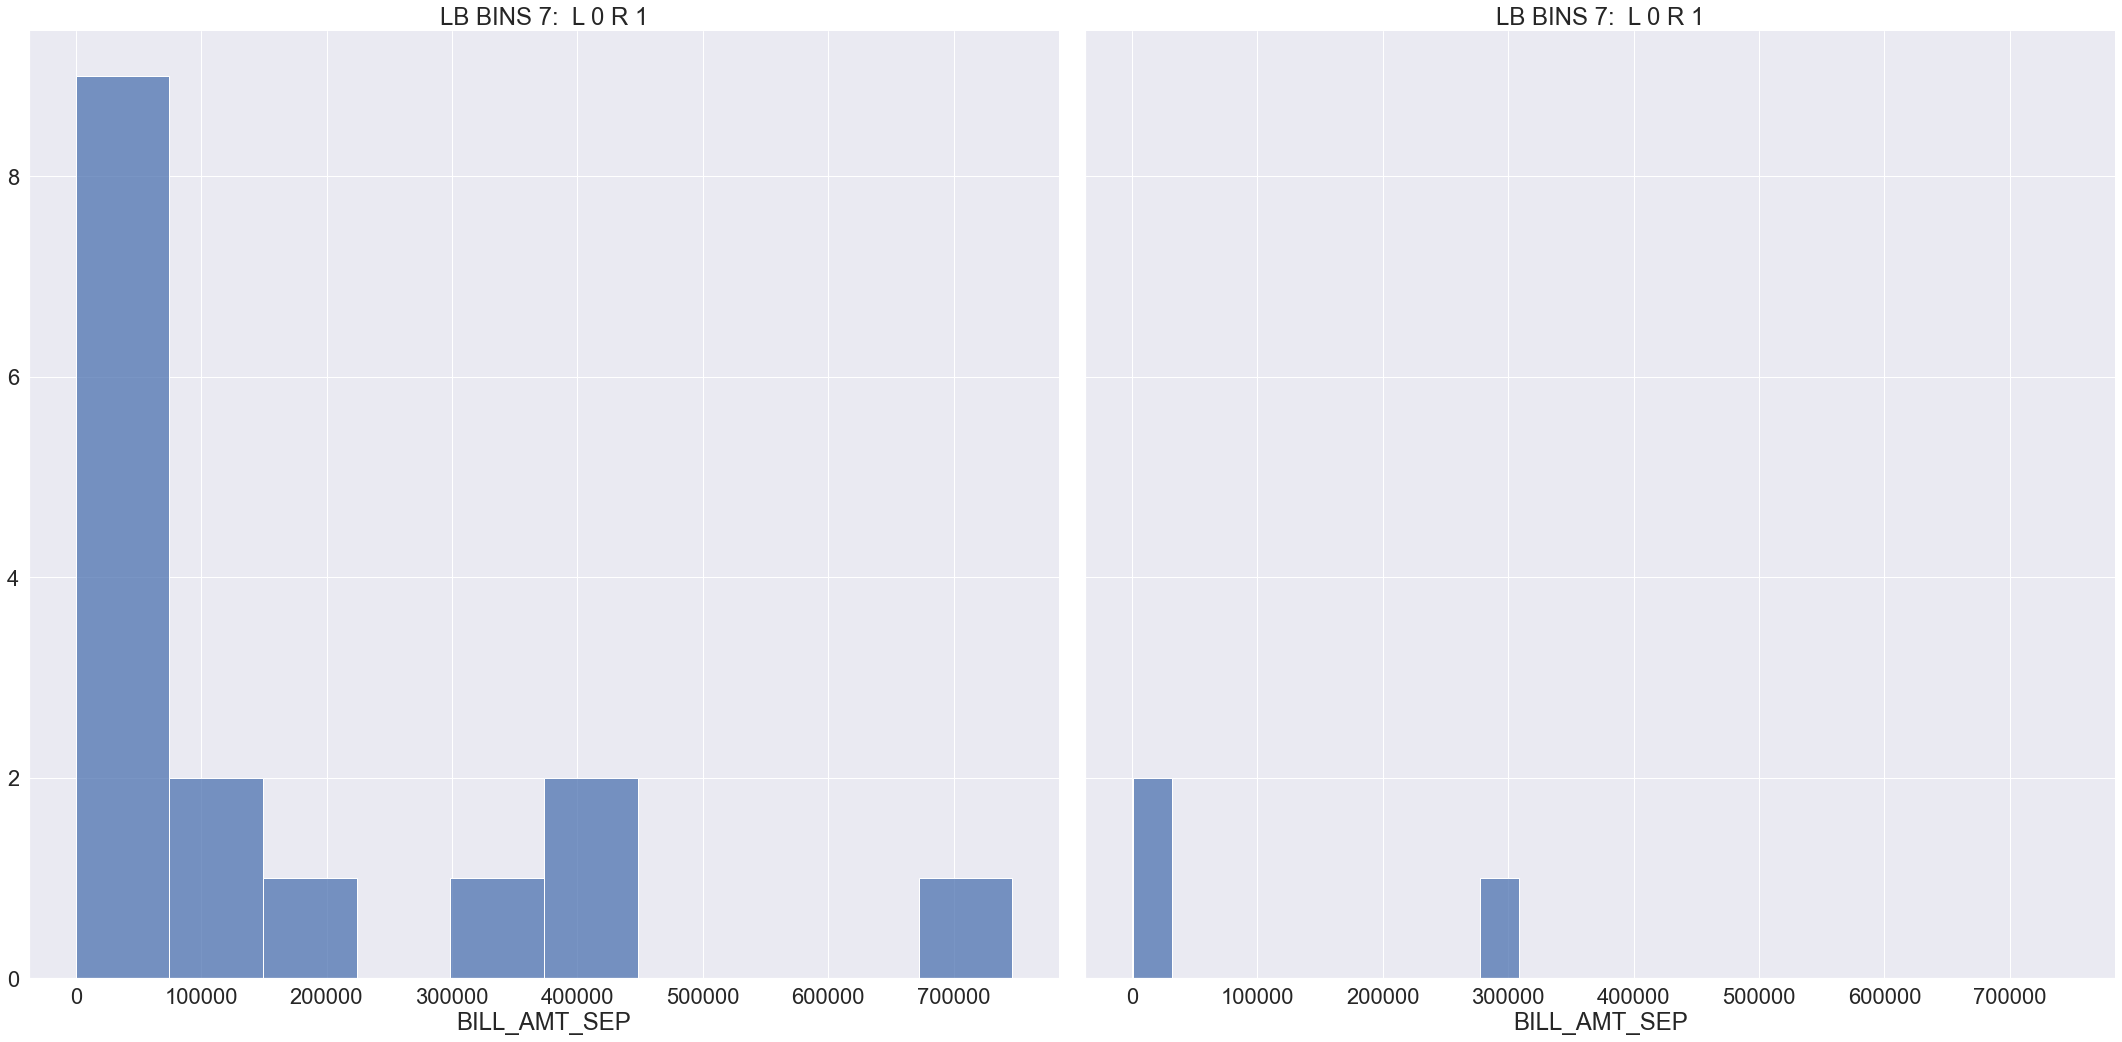

In [50]:
for i in np.sort(train["BINS_2"].unique()):
    if i == 9:
        break
    kwargs = {"bins":10}
    sns.set(font_scale=2) 
    lb_0 = train[train["BINS_2"] == i]
    fg = sns.FacetGrid(lb_0,   col="default", height = 15)
    fg.map(sns.histplot, "BILL_AMT_SEP",**kwargs)
    fg.set_titles(template = "LB BINS {:.0f}:  L 0 R 1".format(i))
    plt.show()

In [51]:
np.histogram_bin_edges(train["BILL_AMT_SEP"], bins  = 10)

array([-165580. ,  -52570.9,   60438.2,  173447.3,  286456.4,  399465.5,
        512474.6,  625483.7,  738492.8,  851501.9,  964511. ])

In [56]:
for i in range(train.shape[0]):
    lb = train.loc[i, "BILL_AMT_SEP"]
    if lb >= -165580 and lb < -52570.9:
        train.loc[i, "BINS_3"] = 0   ##[10000,109000)
    elif lb < 60438.2:
        train.loc[i, "BINS_3"] = 1    ##[109000, 208000)
    elif lb < 173447.3: 
        train.loc[i, "BINS_3"] = 2   ##[208000, 307000)
    elif lb <286456.4 :
        train.loc[i, "BINS_3"] = 3   ##[307000, 406000)
    elif lb< 399465.5:
        train.loc[i, "BINS_3"] = 4   ##[406000, 505000)
    elif lb <512474.6:
        train.loc[i, "BINS_3"] = 5   ##[505000, 604000)
    elif lb <625483.7:
        train.loc[i, "BINS_3"] = 6   ##[604000, 703000)
    elif lb <738492.8:
        train.loc[i, "BINS_3"] = 7   ##[703000, 802000)
    elif lb < 851501.9:
        train.loc[i, "BINS_3"] = 8   ##[802000, 901000)
    else:
        train.loc[i, "BINS_3"] = 9  ##[901000, 1000000)

In [72]:
ratio_df = train.groupby(["BINS_2", "BINS_3"]).agg({"default":"sum"}) / train.groupby(["BINS_2", "BINS_3"]).agg({"default":"count"})

In [104]:
train["BINS_2"].unique()

array([1., 0., 6., 2., 3., 4., 5., 9., 7.])

In [101]:
len(train["BINS_2"].unique())

9

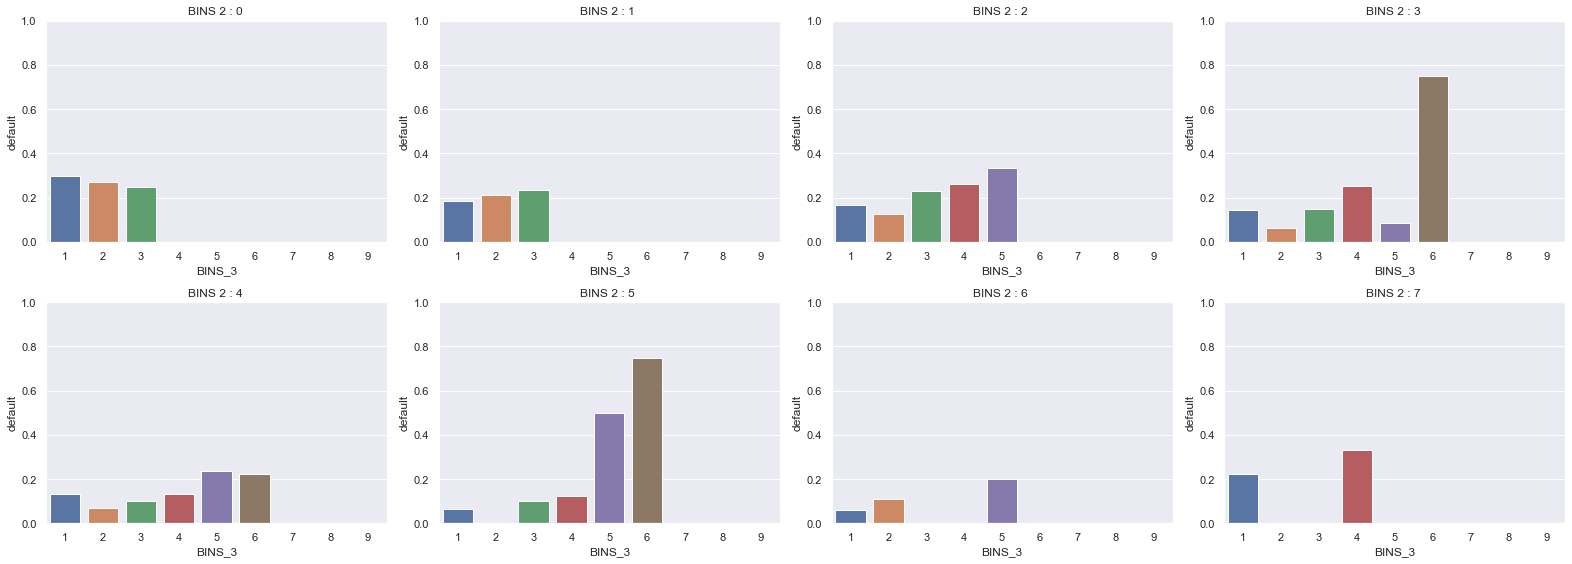

In [114]:
fig, ax = plt.subplots(2, round(len(train["BINS_2"].unique())/2), figsize = (22,8))
ax = ax.flatten()
sns.set(font_scale=1) 

for (i, bin) in enumerate(np.sort(train["BINS_2"].unique())):
    if bin == 9:
        break
    
    sns.barplot(data = ratio_df.loc[bin], x = ratio_df.loc[bin]["default"].index,y = "default", ax = ax[i], order =[1,2,3,4,5,6,7,8,9])
    ax[i].set_title("BINS 2 : {} ".format(bin.astype(np.int)))
    ax[i].set_ylim(0,1)
    
plt.tight_layout()
plt.show()

In [158]:
lr_train_data = pd.DataFrame(index = range(1, train.shape[0]))

# PAY_SEP Dummay
lr_train_data = pd.concat([lr_train_data, pd.get_dummies(train["PAY_SEP"], prefix = "PAY_SEP", drop_first = True)], axis = 1)
# BINS_1 : AGE
lr_train_data = pd.concat([lr_train_data, pd.get_dummies(train["BINS_1"], prefix = "BINS_1", drop_first = True)], axis = 1)
# BINS_2 :LIMIT_BAL
lr_train_data = pd.concat([lr_train_data, pd.get_dummies(train["BINS_2"], prefix = "BINS_2", drop_first = True)], axis = 1)
# BINS_3:LIMIT_BAL
lr_train_data = pd.concat([lr_train_data, pd.get_dummies(train["BINS_3"], prefix = "BINS_3", drop_first = True)], axis = 1)

In [159]:
lr_train_data.head()

,PAY_SEP_-1,PAY_SEP_0,PAY_SEP_1,PAY_SEP_2,PAY_SEP_3,PAY_SEP_4,PAY_SEP_5,PAY_SEP_6,PAY_SEP_7,PAY_SEP_8,...,BINS_2_9.0,BINS_3_1.0,BINS_3_2.0,BINS_3_3.0,BINS_3_4.0,BINS_3_5.0,BINS_3_6.0,BINS_3_7.0,BINS_3_8.0,BINS_3_9.0
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [160]:
from sklearn.linear_model import LogisticRegression
y_train = train["default"]
logr = LogisticRegression(fit_intercept = False)
logr.fit(lr_train_data, y_train)

C:\Anaconda\envs\py37tf20\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [161]:
import statsmodels.api as sm
y_train = train["default"]
lr_model = sm.GLM(y_train, lr_train_data, family=sm.families.Binomial())    
lr_model_result = lr_model.fit()
print(lr_model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                23996
Model:                            GLM   Df Residuals:                    23965
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10815.
Date:                Wed, 02 Dec 2020   Deviance:                       21630.
Time:                        16:14:16   Pearson chi2:                 2.38e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PAY_SEP_-1     0.2597      0.076      3.427      0.0

In [165]:
lr_train_data_drop = lr_train_data.drop(["BINS_1_1.0", "BINS_1_2.0","BINS_1_3.0", "BINS_1_4.0","BINS_1_5.0", "BINS_2_7.0", "BINS_2_9.0", "BINS_3_5.0","BINS_3_6.0", "BINS_3_7.0", "BINS_3_8.0", "BINS_3_9.0"], axis = 1)
y_train = train["default"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(lr_train_data_drop, y_train, test_size = 0.3, shuffle = True,random_state = 475)

In [163]:
#X_train_const = sm.add_constant(X_train)
lr_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())    
lr_model_result = lr_model.fit()
print(lr_model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                16797
Model:                            GLM   Df Residuals:                    16777
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7571.2
Date:                Wed, 02 Dec 2020   Deviance:                       15142.
Time:                        16:14:20   Pearson chi2:                 1.66e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PAY_SEP_-1     0.2211      0.088      2.518      0.0

In [197]:
from sklearn.linear_model import LogisticRegression
y_train = train["default"]
X_train, X_val, y_train, y_val = train_test_split(lr_train_data, y_train, test_size = 0.3, shuffle = True,random_state = 475)

logr = LogisticRegression(fit_intercept = True, max_iter = 1000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [211]:
log_coef = pd.DataFrame(logr.coef_.reshape(-1,1), index =X_train.columns)
log_coef.loc["intercept",0] = logr.intercept_
log_coef = log_coef.rename(columns = {0: "coefficient"})

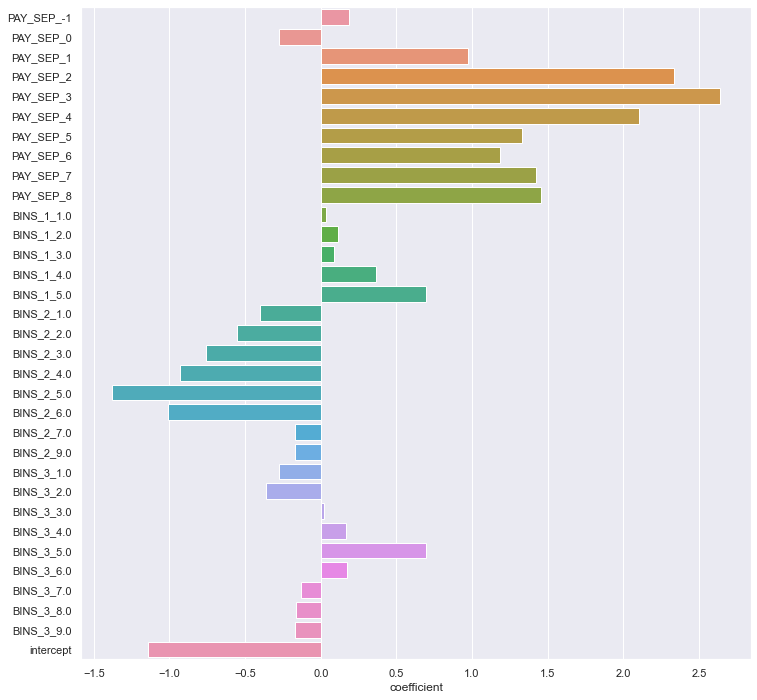

In [213]:
fig, ax = plt.subplots(1,1,figsize = (12,12))

sns.barplot(y = log_coef.index, x = "coefficient", data = log_coef, ax = ax)
plt.show()

In [219]:
y_proba = logr.predict_proba(X_val)
y_pred = logr.predict(X_val)

In [223]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[5360,  236],
       [1100,  503]], dtype=int64)